In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
data

,Unnamed: 0,arthritis,gender,age,edu,married,alone,meat,fish,bean,...,feeding,playcards,radio,social,standup,pickup,self_health_score,diet_score,ability_score,propotion
0,1,0,0,90,0,1,0,1,1,1,...,5,5,1,5,1,2,6,4,9,0.2600
1,2,1,0,90,0,1,0,1,1,1,...,5,2,1,5,1,2,7,3,9,1.0000
2,3,1,0,101,0,1,0,0,0,0,...,5,5,4,5,1,1,7,3,9,0.0286
3,4,0,0,93,0,1,0,1,1,1,...,5,5,1,5,1,1,9,3,8,0.0750
4,5,1,0,95,0,1,0,0,0,0,...,5,5,1,5,2,1,9,8,8,0.2222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,16509,1,1,70,0,1,0,1,1,1,...,1,5,2,5,2,1,11,5,8,0.1267
16509,16510,1,0,68,6,0,0,1,1,1,...,5,2,1,5,1,1,7,5,7,0.0500
16510,16511,0,1,69,0,0,0,1,1,1,...,5,5,3,5,1,1,6,9,7,2.7273
16511,16512,0,0,83,0,1,1,1,1,1,...,4,5,4,5,1,1,9,4,7,0.1200


In [3]:
data.info

<bound method DataFrame.info of        Unnamed: 0  arthritis  gender  age  edu  married  alone  meat  fish  \
0               1          0       0   90    0        1      0     1     1   
1               2          1       0   90    0        1      0     1     1   
2               3          1       0  101    0        1      0     0     0   
3               4          0       0   93    0        1      0     1     1   
4               5          1       0   95    0        1      0     0     0   
...           ...        ...     ...  ...  ...      ...    ...   ...   ...   
16508       16509          1       1   70    0        1      0     1     1   
16509       16510          1       0   68    6        0      0     1     1   
16510       16511          0       1   69    0        0      0     1     1   
16511       16512          0       0   83    0        1      1     1     1   
16512       16513          1       0   70    0        1      0     1     1   

       bean  ...  feeding  play

In [4]:
x = data.iloc[:,2:32]
y = data.iloc[:,1]

In [5]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [6]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10, random_state=42, tol=0.0001)


In [7]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.89726420
Iteration 2, loss = 0.54928133
Iteration 3, loss = 0.54322616
Iteration 4, loss = 0.55185191
Iteration 5, loss = 0.55050212
Iteration 6, loss = 0.53592009
Iteration 7, loss = 0.53494832
Iteration 8, loss = 0.55025236
Iteration 9, loss = 0.53062510
Iteration 10, loss = 0.55490094
Iteration 11, loss = 0.53865712
Iteration 12, loss = 0.55243584
Iteration 13, loss = 0.56178521
Iteration 14, loss = 0.54118418
Iteration 15, loss = 0.54379977
Iteration 16, loss = 0.53700680
Iteration 17, loss = 0.54587699
Iteration 18, loss = 0.53502327
Iteration 19, loss = 0.54134737
Iteration 20, loss = 0.53909595
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [8]:
from sklearn import metrics
print(" tn     fp   fn    tp")
print(metrics.confusion_matrix(y_test,y_pred).ravel())

 tn     fp   fn    tp
[2586    1  716    0]


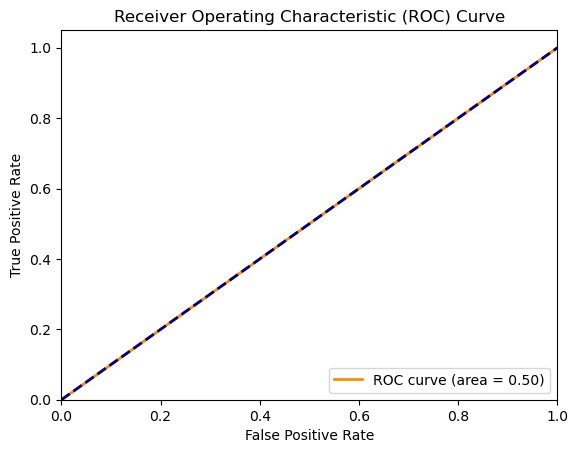

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 假设 y_test 是测试集的真实标签，y_pred_prob 是模型的预测概率
# 注意：这里假设你已经使用模型进行了预测，并得到了预测概率
# 如果你还没有模型或者没有预测结果，需要先进行模型的训练和预测
# 以下代码仅用于演示如何绘制ROC曲线，需要根据实际情况进行调整

# 计算 ROC 曲线的 FPR 和 TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# 计算 ROC 曲线下的面积（AUC）
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
